In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.linear_model

In [2]:
dfWhite = pd.read_csv('../white.csv')
dfEmpty = pd.read_csv('../empty.csv')
dfBlack = pd.read_csv('../black.csv')
dfRed = pd.read_csv('../red120ms.csv')
dfGreen = pd.read_csv('../green120ms.csv')
#dfConveyor = pd.read_csv('data4.csv')
dfWhite.head(100)

Red  Green   Blue  Clear  ColorTemp    Lux
0   62991  65535  56653  65535       5983  41522
1   64645  65535  57742  65535       6097  40188
2   62405  65535  55545  65535       5786  42524
3   62413  65535  55556  65535       5787  42513
4   62410  65535  55551  65535       5786  42518
..    ...    ...    ...    ...        ...    ...
86  58251  65535  53411  65535       5684  45434
87  53133  65535  46953  65535       4999  51822
88  65535  65535  59879  65535       6595  38335
89  65535  65535  59863  65535       6590  38347
90  65535  65535  59868  65535       6592  38343

[91 rows x 6 columns]

In [3]:
dfWhite.columns

Index(['Red', 'Green', 'Blue', 'Clear', 'ColorTemp', 'Lux'], dtype='object')

In [4]:
dfWhitePoints = dfWhite[['Red','Green','Blue']].values
dfEmptyPoints = dfEmpty[['Red','Green','Blue']].values
dfBlackPoints = dfBlack[['Red','Green','Blue']].values
dfWhiteTriangles = Delaunay(dfWhitePoints[:, :2])

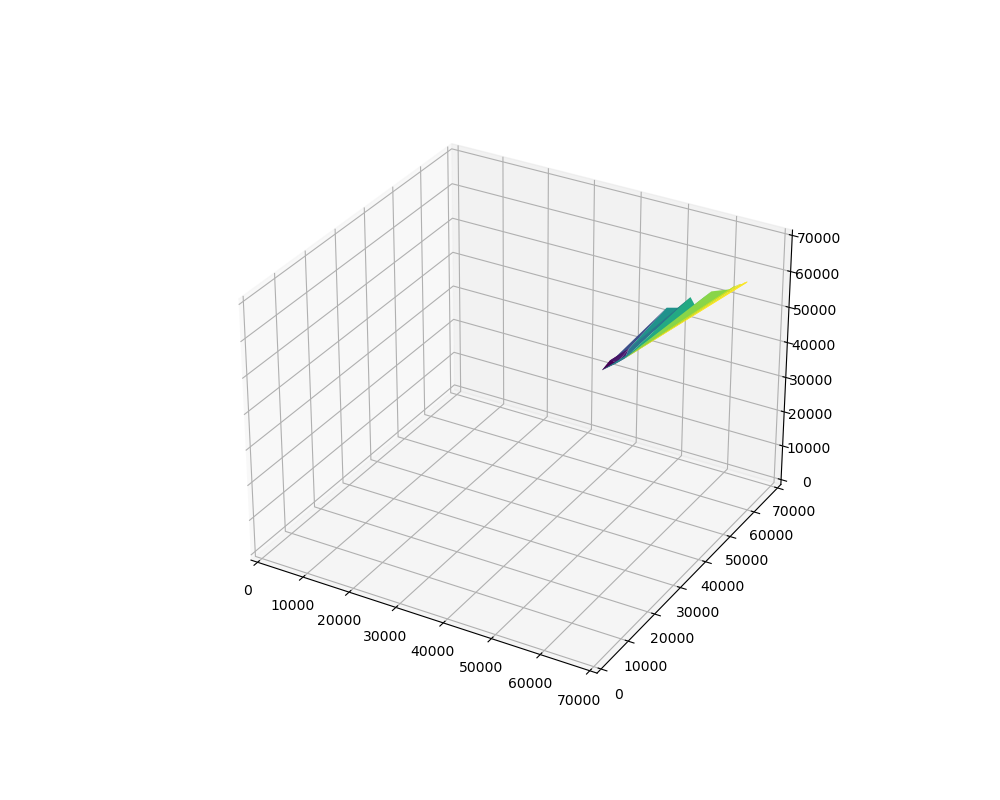

In [5]:
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# Plot the surface
ax.plot_trisurf(dfWhitePoints[:, 0], dfWhitePoints[:, 1], dfWhitePoints[:, 2], triangles=dfWhiteTriangles.simplices, cmap='viridis', edgecolor='none')

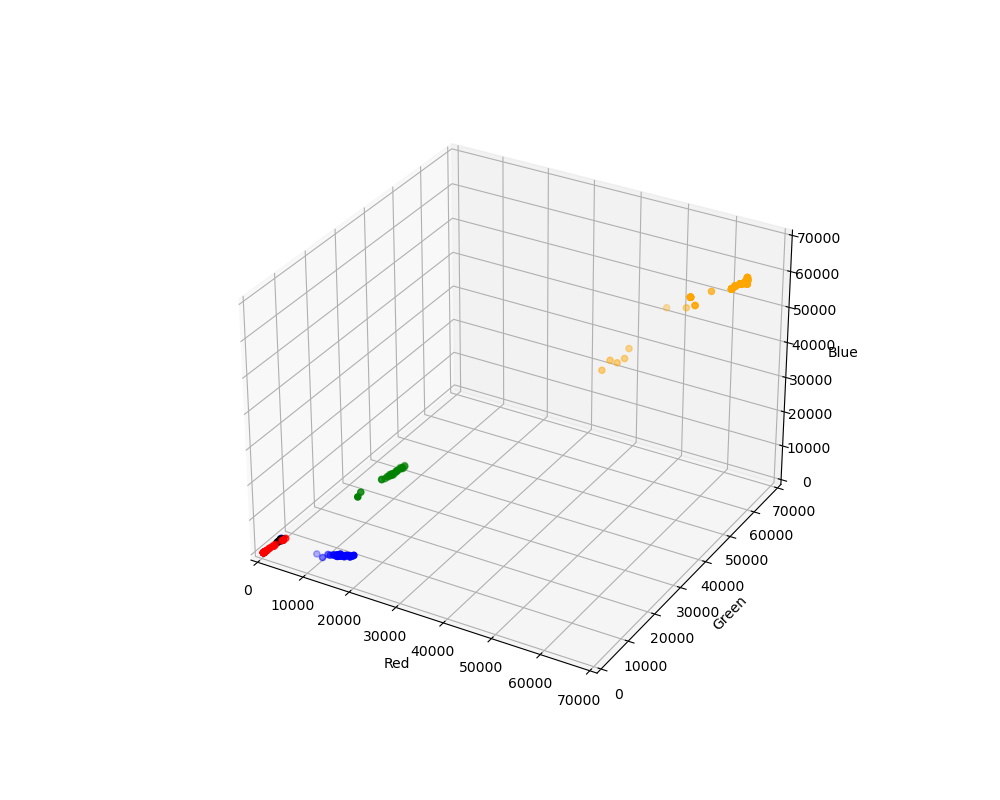

In [6]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# ax.set_xlim(1800, 3000)
# ax.set_ylim(2400, 3500)
# ax.set_zlim(2200, 3300)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite['Red'], dfWhite['Green'], dfWhite['Blue'], color='orange')

fg2 = ax.scatter3D(dfEmpty['Red'], dfEmpty['Green'], dfEmpty['Blue'], color='red')

fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

fg3 = ax.scatter3D(dfGreen['Red'], dfGreen['Green'], dfGreen['Blue'], color='green')

fg3 = ax.scatter3D(dfRed['Red'], dfRed['Green'], dfRed['Blue'], color='blue')

plt.plot([500, 2500], [900, 4000], [500, 3000], color='black', lw=2);
plt.plot([0, 3200], [0, 3500], [0, 3500], color='red', lw=2);

plt.plot(2300, 3000, 3000, 'bo');
# plt.plot([45000, 65536], [0, 3500], [0, 3500], color='red', lw=2);

#fg4 = ax.scatter3D(dfConveyor['r'], dfConveyor['g'], dfConveyor['b'])

In [7]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([1900, 3000, 2200])
B = np.array([2400, 3700, 2700])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfBlackPoints]

# Create DataFrame
df_distances_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_distances_black['distance_to_line'] = distances

print(df_distances_black)

     red  green  blue  distance_to_line
0   2018   3262  2348         57.895064
1   2051   3293  2351         57.990595
2   2055   3309  2356         64.887938
3   2081   3359  2432         61.385518
4   2033   3346  2402         93.055973
5   1983   3338  2422        132.245639
6   1965   3305  2389        125.935048
7   1946   3264  2358        117.008158
8   1930   3224  2295        107.343967
9   1932   3277  2353        135.308925
10  2005   3344  2417        115.654746
11  2034   3357  2401         99.113138
12  2046   3342  2416         80.091362
13  2043   3346  2390         86.845154
14  2055   3379  2432         94.161156
15  2084   3413  2468         90.779453
16  2105   3360  2390         60.281327
17  2096   3401  2465         74.006142
18  2125   3451  2486         79.100626
19  2133   3476  2501         87.104373
20  1813   2881  2156         36.068117
21  1922   3171  2271         82.852552
22  2078   3332  2407         48.921913
23  2044   3351  2415         86.837477


In [8]:
df_distances_black['distance_to_line'].max()

156.6270098099948

In [9]:
  def angle_between_vector_and_point_AP(P, A, B):
    AP = P - A
    AB = B - A
    
    dot_product_AP = np.dot(AP, AB)
    
    mag_AP = np.linalg.norm(AP)
    mag_AB = np.linalg.norm(AB)
    
    cos_theta_AP = dot_product_AP / (mag_AP * mag_AB)
    
    angle_rad_AP = np.arccos(np.clip(cos_theta_AP, -1.0, 1.0))
    
    angle_deg_AP = np.degrees(angle_rad_AP)
    
    return angle_deg_AP


def angle_between_vector_and_point_BP(P, A, B):
    AB = B - A
    BP = B - P
    
    dot_product_BP = np.dot(BP, AB)
    
    mag_AB = np.linalg.norm(AB)
    mag_BP = np.linalg.norm(BP)
    
    cos_theta_BP = dot_product_BP / (mag_BP * mag_AB)
    
    angle_rad_BP = np.arccos(np.clip(cos_theta_BP, -1.0, 1.0))

    angle_deg_BP = np.degrees(angle_rad_BP)
    
    return angle_deg_BP

A = np.array([1900, 3000, 2200])
B = np.array([2400, 3700, 2700])

angles_deg_AP = [angle_between_vector_and_point_AP(P, A, B) for P in dfBlackPoints]
angles_deg_BP = [angle_between_vector_and_point_BP(P, A, B) for P in dfBlackPoints]

df_angles_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_angles_black['AP-angle'] = angles_deg_AP
df_angles_black['BP-angle'] = angles_deg_BP

#df_angles_black = df_angles_black[df_angles_black['AP-angle'] <= 90]
#df_angles_black = df_angles_black[df_angles_black['BP-angle'] <= 90]

print(df_angles_black)

     red  green  blue    AP-angle   BP-angle
0   2018   3262  2348   10.318446   4.887923
1   2051   3293  2351    9.203810   5.200941
2   2055   3309  2356    9.851120   5.962161
3   2081   3359  2432    7.599294   6.546895
4   2033   3346  2402   12.734551   9.065392
5   1983   3338  2422   18.684100  12.351451
6   1965   3305  2389   20.203584  10.919546
7   1946   3264  2358   22.093868   9.400606
8   1930   3224  2295   25.967518   7.889966
9   1932   3277  2353   25.177241  10.832353
10  2005   3344  2417   15.981647  11.069491
11  2034   3357  2401   13.293129   9.771930
12  2046   3342  2416   10.733485   7.964273
13  2043   3346  2390   11.938014   8.455064
14  2055   3379  2432   11.541396  10.002539
15  2084   3413  2468    9.945878  10.768844
16  2105   3360  2390    7.600383   6.332192
17  2096   3401  2465    8.196721   8.743081
18  2125   3451  2486    7.845234  10.643328
19  2133   3476  2501    8.216610  12.535186
20  1813   2881  2156  166.440452   1.804981
21  1922  

In [23]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([48000, 64800, 44000])
B = np.array([66000, 66500, 61000])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfWhitePoints]

# Create DataFrame
df_distances_white = pd.DataFrame(dfWhitePoints, columns=['red', 'green', 'blue'])
df_distances_white['distance_to_line'] = distances

print(df_distances_white)

      red  green   blue  distance_to_line
0   62991  65535  56653       1252.045591
1   64645  65535  57742       1618.364100
2   62405  65535  55545       1587.514680
3   62413  65535  55556       1585.457589
4   62410  65535  55551       1586.815017
..    ...    ...    ...               ...
86  58251  65535  53411        294.993225
87  53133  65535  46953       1418.607823
88  65535  65535  59879       1015.983941
89  65535  65535  59863       1021.056638
90  65535  65535  59868       1019.459814

[91 rows x 4 columns]


In [24]:
top_10_dist = df_distances_white['distance_to_line'].nlargest(10)
top_10_dist

81    12732.335246
80    11221.540288
82    10900.682377
83     9934.686355
84     7640.509845
41     1972.677548
40     1966.874597
39     1965.585696
42     1963.652785
44     1703.897685
Name: distance_to_line, dtype: float64

In [25]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([0, 0, 0])
B = np.array([3100, 3600, 3600])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfEmptyPoints]

# Create DataFrame
df_distances_empty = pd.DataFrame(dfEmptyPoints, columns=['red', 'green', 'blue'])
df_distances_empty['distance_to_line'] = distances

print(df_distances_empty)

     red  green  blue  distance_to_line
0    252    258   198         63.723103
1    237    229   176         65.311673
2    265    269   207         67.477058
3    241    245   188         61.618952
4    230    234   180         58.409860
5    244    249   192         61.332316
6    247    253   195         61.790422
7    233    239   184         58.315545
8    222    229   176         55.309708
9    226    234   180         55.869143
10   264    268   207         66.648278
11   265    268   207         67.301676
12   261    264   204         66.201953
13   267    271   209         67.657591
14   266    269   208         67.392781
15   266    269   208         67.392781
16   263    267   206         66.557888
17   241    247   190         60.513938
18   231    237   182         58.138970
19   230    236   182         57.304781
20   231    237   183         57.393291
21   232    238   184         57.481910
22   233    240   185         57.769579
23   234    242   187         57.314939


In [26]:
top_10_dist = df_distances_empty['distance_to_line'].nlargest(10)
top_10_dist

42    302.881153
43    245.160415
44    208.034013
45    183.802732
46    151.755849
41    108.862849
51     87.707034
57     77.650441
56     71.129208
53     68.752703
Name: distance_to_line, dtype: float64

In [11]:
dfWhite_train, dfWhite_test = train_test_split(dfWhite, test_size=0.2, random_state=50000)

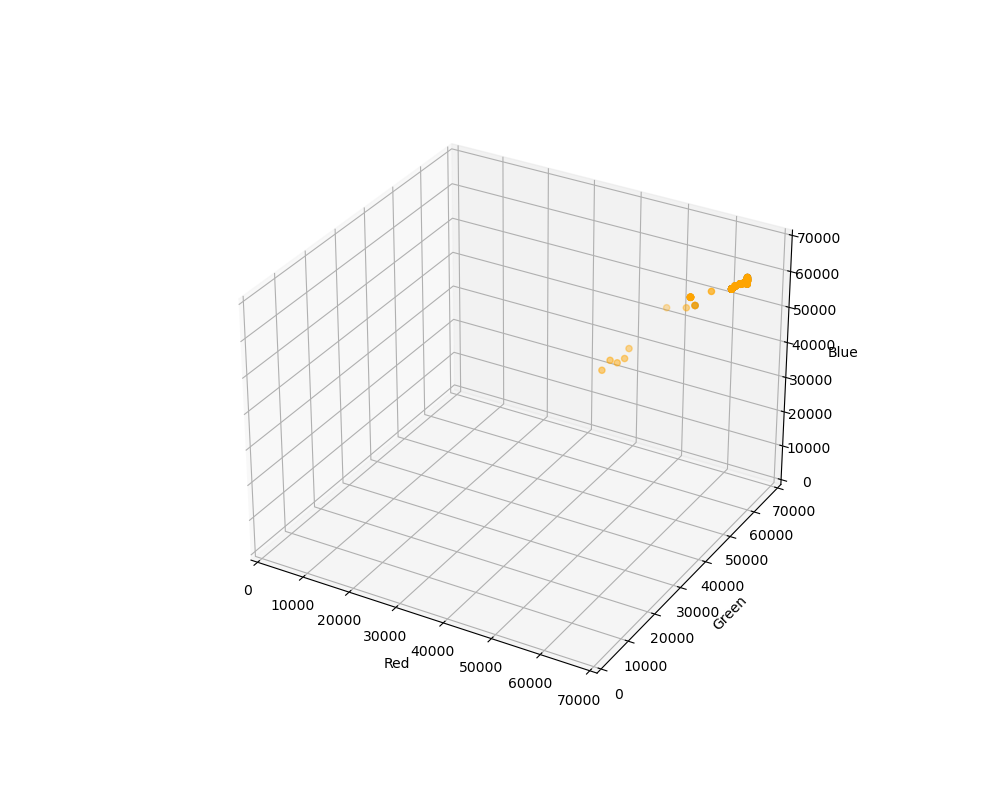

In [12]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite_train['Red'], dfWhite_train['Green'], dfWhite_train['Blue'], color='orange')

fg2 = ax.scatter3D(dfWhite_test['Red'], dfWhite_test['Green'], dfWhite_test['Blue'], color='black')

#fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

$y = \beta_0 + \sum_{i = 1}^m \beta_i x_i$

* $\beta_0$ and $\beta_i$ - fitted parameters
* $y$ - dependent variable
* $x_i$ - independent variables
* `reg.intercept_` - $\beta_0$ 
* `reg.coef_` - $\beta_i$ for $1 \leq i \leq m$.

In [13]:
#Linear regression for the Red
X_reg_train = dfWhite_train[['Green','Blue']].copy()
y_reg_train = dfWhite_train[['Red']].copy()

X_reg_train = dfWhite_test[['Green','Blue']].copy()
y_reg_train = dfWhite_test[['Red']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1838.0769519379464, 0.0, 1.0827773615644154)

In [14]:
#Linear regression for the Green
X_reg_train = dfWhite_train[['Red','Blue']].copy()
y_reg_train = dfWhite_train[['Green']].copy()

X_reg_train = dfWhite_test[['Red','Blue']].copy()
y_reg_train = dfWhite_test[['Green']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(65535.0, 0.0, 0.0)

In [15]:
#Linear regression for the Blue
X_reg_train = dfWhite_train[['Red','Green']].copy()
y_reg_train = dfWhite_train[['Blue']].copy()

X_reg_train = dfWhite_test[['Red','Green']].copy()
y_reg_train = dfWhite_test[['Blue']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1097.998974262322, 0.8792146858302762, 0.0)

In [16]:
dfWhite['Blue_predicted'] = reg.predict(dfWhite[['Red','Green']].values) 
dfWhite[['Blue','Blue_predicted']]

Blue  Blue_predicted
0   56653    56480.611249
1   57742    57934.832340
2   55545    55965.391444
3   55556    55972.425161
4   55551    55969.787517
..    ...             ...
86  53411    52313.133639
87  46953    47813.312876
88  59879    58717.333410
89  59863    58717.333410
90  59868    58717.333410

[91 rows x 2 columns]